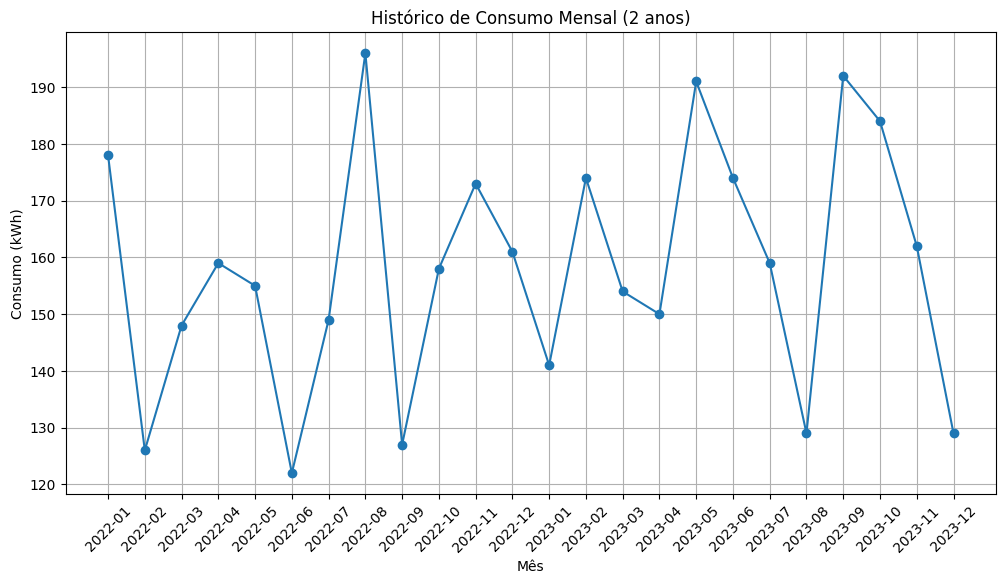

In [2]:
# gráfico com histórico de consumo mensal
import pandas as pd
import matplotlib.pyplot as plt

# arquivo CSV
df = pd.read_csv("historico_consumo_ampliado.csv")

# plotando o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df["mes"], df["consumo_kwh"], marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.title("Histórico de Consumo Mensal (2 anos)")
plt.xlabel("Mês")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.show()


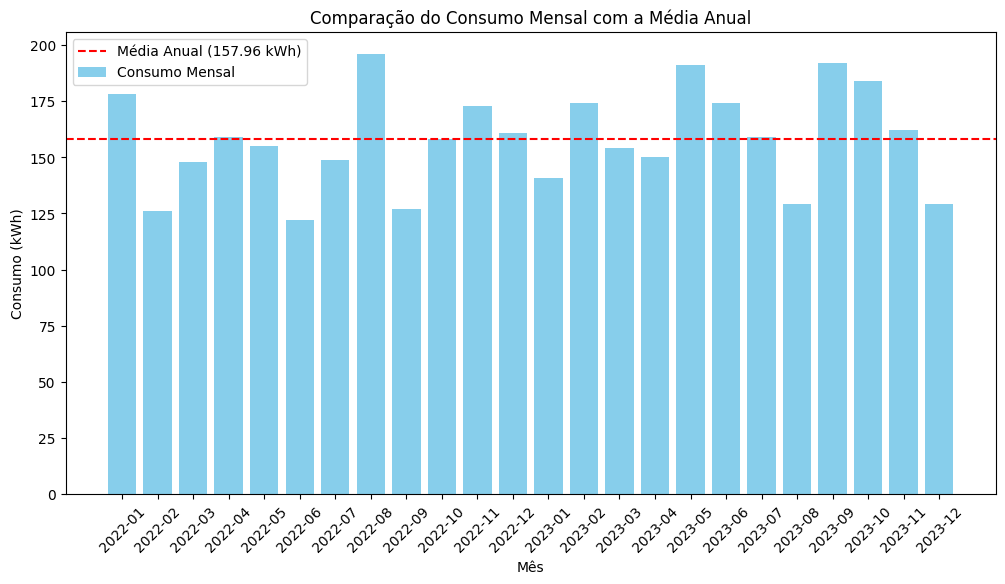

In [3]:
# gráfico de média (comparação mensal com a média anual)
# calculando média anual
media_anual = df["consumo_kwh"].mean()

# plotando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df["mes"], df["consumo_kwh"], color="skyblue", label="Consumo Mensal")
plt.axhline(media_anual, color="red", linestyle="--", label=f"Média Anual ({media_anual:.2f} kWh)")
plt.xticks(rotation=45)
plt.title("Comparação do Consumo Mensal com a Média Anual")
plt.xlabel("Mês")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.show()


c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


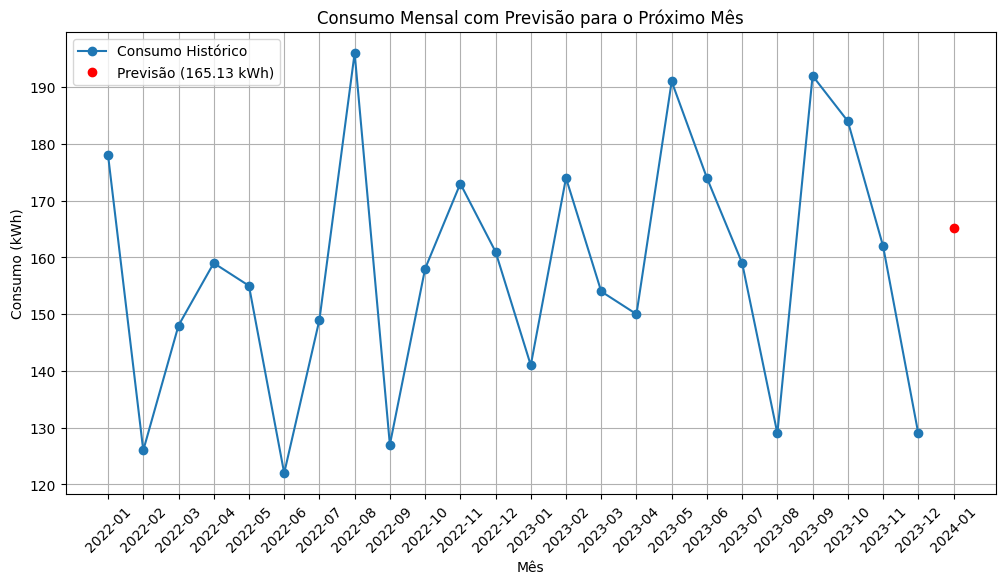

In [4]:
# gráfico com previsão (consumo mensal com previsão para o próximo mês)
from sklearn.linear_model import LinearRegression
import numpy as np

# convertendo meses em valores numéricos para regressão
df["mes_numerico"] = range(1, len(df) + 1)

# modelo de regressão
X = df[["mes_numerico"]]
y = df["consumo_kwh"]
model = LinearRegression()
model.fit(X, y)

# previsão para o próximo mês
proximo_mes = np.array([[len(df) + 1]])
previsao = model.predict(proximo_mes)[0]

# plotando o gráfico com previsão
plt.figure(figsize=(12, 6))
plt.plot(df["mes"], df["consumo_kwh"], marker="o", linestyle="-", label="Consumo Histórico")
plt.plot("2024-01", previsao, "ro", label=f"Previsão ({previsao:.2f} kWh)")
plt.xticks(rotation=45)
plt.title("Consumo Mensal com Previsão para o Próximo Mês")
plt.xlabel("Mês")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# classificação KNN para a identificação de perfil de consumo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

# ex. de dataset
data = {
    "mes": range(1, 13),
    "consumo_kwh": [120, 150, 130, 160, 140, 180, 170, 165, 175, 160, 155, 180],
    "perfil": ["baixo", "medio", "baixo", "alto", "medio", "alto", "alto", "medio", "alto", "medio", "medio", "alto"]
}
df = pd.DataFrame(data)

# dividindo os dados em treino e teste
X = df[["mes", "consumo_kwh"]]
y = df["perfil"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# predição e avaliação
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        alto       0.00      0.00      0.00         0
       baixo       0.00      0.00      0.00         1
       medio       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.17      0.17      0.17         3
weighted avg       0.33      0.33      0.33         3



c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [6]:
# classificação (árvore de decisão para prever aumento ou diminuição no consumo)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# dados simulados de consumo com indicador de aumento ou diminuição
data = {
    "mes": range(1, 13),
    "consumo_kwh": [120, 150, 130, 160, 140, 180, 170, 165, 175, 160, 155, 180],
    "mudanca": ["aumentou", "aumentou", "diminuiu", "aumentou", "diminuiu", "aumentou", "diminuiu", "diminuiu", "aumentou", "diminuiu", "diminuiu", "aumentou"]
}
df = pd.DataFrame(data)

# divisão dos dados
X = df[["mes", "consumo_kwh"]]
y = df["mudanca"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de árvore de decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# predição e avaliação
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    aumentou       0.00      0.00      0.00         1
    diminuiu       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rebec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
# regressão (usando random forest regressor para previsão de consumo futuro)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# dados de consumo mensais
X = np.array(range(1, 13)).reshape(-1, 1)
y = np.array([120, 150, 130, 160, 140, 180, 170, 165, 175, 160, 155, 180])

# modelo random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# previsão do próximo mês (13)
proximo_mes = np.array([[13]])
previsao = rf_model.predict(proximo_mes)
print(f"Previsão de consumo para o próximo mês: {previsao[0]:.2f} kWh")

# avaliação do modelo
y_pred = rf_model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Erro médio quadrático (MSE): {mse:.2f}")


Previsão de consumo para o próximo mês: 174.40 kWh
Erro médio quadrático (MSE): 52.53


In [8]:
# média e mediana do consumo
import pandas as pd

# dados simulados de consumo
data = {
    "mes": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"],
    "consumo_kwh": [120, 150, 130, 160, 140, 180, 170, 165, 175, 160, 155, 180]
}
df = pd.DataFrame(data)

# cálculo da média e mediana
media = df["consumo_kwh"].mean()
mediana = df["consumo_kwh"].median()

print(f"Média de consumo: {media:.2f} kWh")
print(f"Mediana de consumo: {mediana:.2f} kWh")


Média de consumo: 157.08 kWh
Mediana de consumo: 160.00 kWh


In [9]:
# cálculo para saber consumo total anual
consumo_total = df["consumo_kwh"].sum()

print(f"Consumo total anual: {consumo_total} kWh")


Consumo total anual: 1885 kWh


In [10]:
# identificando mês de maior e menor consumo
mes_maior_consumo = df.loc[df["consumo_kwh"].idxmax()]
mes_menor_consumo = df.loc[df["consumo_kwh"].idxmin()]

print(f"Mês de maior consumo: {mes_maior_consumo['mes']} ({mes_maior_consumo['consumo_kwh']} kWh)")
print(f"Mês de menor consumo: {mes_menor_consumo['mes']} ({mes_menor_consumo['consumo_kwh']} kWh)")


Mês de maior consumo: Jun (180 kWh)
Mês de menor consumo: Jan (120 kWh)


In [11]:
import pandas as pd

# Dados simulados de consumo mensal para o ano de 2023
data = {
    "mes": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"],
    "consumo_kwh": [120, 150, 130, 160, 140, 180, 170, 165, 175, 160, 155, 180]
}
df = pd.DataFrame(data)

# Especificando o ano para os dados
ano = 2023

# Cálculo da média anual de consumo
media_anual = df["consumo_kwh"].mean()

# Verificação do consumo em cada mês em relação à média anual
for index, row in df.iterrows():
    consumo = row["consumo_kwh"]
    mes = row["mes"]
    
    if consumo < media_anual:
        print(f"{mes}/{ano}: Parabéns! Seu consumo foi abaixo da média anual ({consumo} kWh < {media_anual:.2f} kWh). Continue economizando!")
    else:
        print(f"{mes}/{ano}: Atenção! Seu consumo foi acima da média anual ({consumo} kWh > {media_anual:.2f} kWh). Tente reduzir o consumo.")


Jan/2023: Parabéns! Seu consumo foi abaixo da média anual (120 kWh < 157.08 kWh). Continue economizando!
Fev/2023: Parabéns! Seu consumo foi abaixo da média anual (150 kWh < 157.08 kWh). Continue economizando!
Mar/2023: Parabéns! Seu consumo foi abaixo da média anual (130 kWh < 157.08 kWh). Continue economizando!
Abr/2023: Atenção! Seu consumo foi acima da média anual (160 kWh > 157.08 kWh). Tente reduzir o consumo.
Mai/2023: Parabéns! Seu consumo foi abaixo da média anual (140 kWh < 157.08 kWh). Continue economizando!
Jun/2023: Atenção! Seu consumo foi acima da média anual (180 kWh > 157.08 kWh). Tente reduzir o consumo.
Jul/2023: Atenção! Seu consumo foi acima da média anual (170 kWh > 157.08 kWh). Tente reduzir o consumo.
Ago/2023: Atenção! Seu consumo foi acima da média anual (165 kWh > 157.08 kWh). Tente reduzir o consumo.
Set/2023: Atenção! Seu consumo foi acima da média anual (175 kWh > 157.08 kWh). Tente reduzir o consumo.
Out/2023: Atenção! Seu consumo foi acima da média anual